In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'NanumGothic'

In [3]:
df = pd.read_csv('./data/공공자전거 대여이력 정보_2020.06.csv', engine = 'python')
df

,자전거번호,대여일시,대여대여소번호,대여대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-36260,2020-06-01 00:00:35,1681,현대6차 아파트,0,2020-06-01 00:05:24,1665,양지근린공원앞,0,5,0.00
1,SPB-36146,2020-06-01 00:01:47,816,신용산역 6번출구 앞,0,2020-06-01 00:05:54,829,베르가모앞,0,4,0.00
2,SPB-33273,2020-06-01 00:03:05,1050,둔촌역 3번 출입구,0,2020-06-01 00:05:59,1078,둔촌사거리,0,3,0.00
3,SPB-35969,2020-06-01 00:04:31,1209,잠실나루역 (2번 출구 쪽),0,2020-06-01 00:06:10,1209,잠실나루역 (2번 출구 쪽),0,2,0.00
4,SPB-30703,2020-06-01 00:00:46,1132,등촌역 7번출구,0,2020-06-01 00:06:53,1169,염창역 1번 출구,0,6,0.00
...,...,...,...,...,...,...,...,...,...,...,...
2725232,SPB-12680,2020-06-30 13:01:33,1346,길음8골어린이공원 옆,1,2020-07-01 02:50:27,1347,길음래미안아파트817동 상가 앞,1,15,7230.00
2725233,SPB-40800,2020-06-30 23:56:30,107,신한은행 서교동금융센터점 앞,0,2020-07-01 07:41:32,438,성산2-1 공영주차장,0,465,0.00
2725234,SPB-32402,2020-06-30 16:45:32,1956,도야미리숯불갈비 앞,0,2020-07-01 08:04:52,1956,도야미리숯불갈비 앞,0,919,39786.76
2725235,SPB-38526,2020-06-30 23:23:38,703,오목교역 7번출구 앞,0,2020-07-01 08:37:15,734,신트리공원 입구,0,554,0.00


In [4]:
df.isnull().sum()

자전거번호      0
대여일시       0
대여대여소번호    0
대여대여소명     0
대여거치대      0
반납일시       0
반납대여소번호    0
반납대여소명     0
반납거치대      0
이용시간       0
이용거리       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2725237 entries, 0 to 2725236
Data columns (total 11 columns):
 #   Column   Dtype  
---  ------   -----  
 0   자전거번호    object 
 1   대여일시     object 
 2   대여대여소번호  int64  
 3   대여대여소명   object 
 4   대여거치대    int64  
 5   반납일시     object 
 6   반납대여소번호  int64  
 7   반납대여소명   object 
 8   반납거치대    int64  
 9   이용시간     int64  
 10  이용거리     float64
dtypes: float64(1), int64(5), object(5)
memory usage: 228.7+ MB


In [6]:
df.describe()

,대여대여소번호,대여거치대,반납대여소번호,반납거치대,이용시간,이용거리
count,2.725237e+06,2.725237e+06,2.725237e+06,2.725237e+06,2.725237e+06,2.725237e+06
mean,1.295493e+03,2.009205e+00,1.294180e+03,1.994612e+00,3.114785e+01,1.165833e+03
std,8.867727e+02,4.307910e+00,8.794585e+02,4.281654e+00,3.233065e+01,3.819571e+03
min,5.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,5.580000e+02,0.000000e+00,5.650000e+02,0.000000e+00,9.000000e+00,0.000000e+00
50%,1.175000e+03,0.000000e+00,1.173000e+03,0.000000e+00,1.900000e+01,0.000000e+00
75%,1.936000e+03,1.000000e+00,1.925000e+03,1.000000e+00,4.300000e+01,0.000000e+00
max,9.999900e+04,4.000000e+01,9.999900e+04,4.000000e+01,2.614000e+03,2.105400e+05


In [7]:
df = df.drop(['자전거번호', '대여대여소번호', '대여거치대', '반납대여소번호', '반납거치대', '이용시간', '이용거리'], axis = 1)
df

,대여일시,대여대여소명,반납일시,반납대여소명
0,2020-06-01 00:00:35,현대6차 아파트,2020-06-01 00:05:24,양지근린공원앞
1,2020-06-01 00:01:47,신용산역 6번출구 앞,2020-06-01 00:05:54,베르가모앞
2,2020-06-01 00:03:05,둔촌역 3번 출입구,2020-06-01 00:05:59,둔촌사거리
3,2020-06-01 00:04:31,잠실나루역 (2번 출구 쪽),2020-06-01 00:06:10,잠실나루역 (2번 출구 쪽)
4,2020-06-01 00:00:46,등촌역 7번출구,2020-06-01 00:06:53,염창역 1번 출구
...,...,...,...,...
2725232,2020-06-30 13:01:33,길음8골어린이공원 옆,2020-07-01 02:50:27,길음래미안아파트817동 상가 앞
2725233,2020-06-30 23:56:30,신한은행 서교동금융센터점 앞,2020-07-01 07:41:32,성산2-1 공영주차장
2725234,2020-06-30 16:45:32,도야미리숯불갈비 앞,2020-07-01 08:04:52,도야미리숯불갈비 앞
2725235,2020-06-30 23:23:38,오목교역 7번출구 앞,2020-07-01 08:37:15,신트리공원 입구


In [8]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])

In [9]:
df['대여월'] = df['대여일시'].dt.month
df['대여일'] = df['대여일시'].dt.day
df['대여요일'] = df['대여일시'].dt.dayofweek
df['대여시간'] = df['대여일시'].dt.hour
df['대여시간_분'] = df['대여일시'].dt.minute

df['반납월'] = df['반납일시'].dt.month
df['반납일'] = df['반납일시'].dt.day
df['반납요일'] = df['반납일시'].dt.dayofweek
df['반납시간'] = df['반납일시'].dt.hour
df['반납시간_분'] = df['반납일시'].dt.minute

In [10]:
df = df.sort_values('대여일시', ignore_index = True)
df

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,2020-06-01 00:41:00,청암자이아파트앞,6,1,0,0,0,6,1,0,0,41
1,2020-06-01 00:00:16,응암시장교차로,2020-06-01 00:08:25,은평구청 교차로,6,1,0,0,0,6,1,0,0,8
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,2020-06-01 00:14:50,바우뫼문화복지회관,6,1,0,0,0,6,1,0,0,14
3,2020-06-01 00:00:26,능골근린공원,2020-06-01 00:07:13,능골근린공원,6,1,0,0,0,6,1,0,0,7
4,2020-06-01 00:00:32,응봉역 1번출구,2020-06-01 00:21:38,청계8가 사거리,6,1,0,0,0,6,1,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725232,2020-06-30 23:59:43,하계동 중평어린이공원 앞,2020-07-01 00:09:19,당현천근린공원,6,30,1,23,59,7,1,2,0,9
2725233,2020-06-30 23:59:43,서교동 사거리,2020-07-01 00:31:51,신사동 성당,6,30,1,23,59,7,1,2,0,31
2725234,2020-06-30 23:59:46,교대역 5번출구뒤,2020-07-01 00:06:20,서초신동아1차아파트 옆,6,30,1,23,59,7,1,2,0,6
2725235,2020-06-30 23:59:48,"번동 주공3, 4단지 교차로",2020-07-01 00:04:31,예수그리스도후기성도교회 앞,6,30,1,23,59,7,1,2,0,4


In [11]:
df = df[df['대여월'] != 5]
df = df[df['반납월'] != 7]
df

,대여일시,대여대여소명,반납일시,반납대여소명,대여월,대여일,대여요일,대여시간,대여시간_분,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,2020-06-01 00:41:00,청암자이아파트앞,6,1,0,0,0,6,1,0,0,41
1,2020-06-01 00:00:16,응암시장교차로,2020-06-01 00:08:25,은평구청 교차로,6,1,0,0,0,6,1,0,0,8
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,2020-06-01 00:14:50,바우뫼문화복지회관,6,1,0,0,0,6,1,0,0,14
3,2020-06-01 00:00:26,능골근린공원,2020-06-01 00:07:13,능골근린공원,6,1,0,0,0,6,1,0,0,7
4,2020-06-01 00:00:32,응봉역 1번출구,2020-06-01 00:21:38,청계8가 사거리,6,1,0,0,0,6,1,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2725083,2020-06-30 23:55:01,천호초교 입구 사거리(일주빌딩),2020-06-30 23:59:41,해공공원(천호동),6,30,1,23,55,6,30,1,23,59
2725088,2020-06-30 23:55:17,가좌삼거리,2020-06-30 23:59:21,가재울 초등학교,6,30,1,23,55,6,30,1,23,59
2725106,2020-06-30 23:56:01,신사역 4번출구 뒤,2020-06-30 23:59:48,한신16차아파트 119동 앞,6,30,1,23,56,6,30,1,23,59
2725126,2020-06-30 23:56:41,쌍문현대1차아파트 108동 앞,2020-06-30 23:58:15,쌍문현대1차아파트 108동 앞,6,30,1,23,56,6,30,1,23,58


In [12]:
df['대여대여소명'] = df['대여대여소명'].astype('category')
df['반납대여소명'] = df['반납대여소명'].astype('category')

### 평균서비스율(10분당 자전거 대여수의 평균) = $\mu$
- $\mu$ = 10이면 10분동안 평균 10대의 자전거 대여

In [13]:
df_rental = df[['대여일시', '대여대여소명', '대여월', '대여일', '대여요일', '대여시간', '대여시간_분']]
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:00:00,합정역 7번출구 앞,6,1,0,0,0
1,2020-06-01 00:00:16,응암시장교차로,6,1,0,0,0
2,2020-06-01 00:00:24,삼호물산버스정류장(23370) 옆,6,1,0,0,0
3,2020-06-01 00:00:26,능골근린공원,6,1,0,0,0
4,2020-06-01 00:00:32,응봉역 1번출구,6,1,0,0,0
...,...,...,...,...,...,...,...
2724714,2020-06-30 23:55:01,천호초교 입구 사거리(일주빌딩),6,30,1,23,55
2724715,2020-06-30 23:55:17,가좌삼거리,6,30,1,23,55
2724716,2020-06-30 23:56:01,신사역 4번출구 뒤,6,30,1,23,56
2724717,2020-06-30 23:56:41,쌍문현대1차아파트 108동 앞,6,30,1,23,56


In [14]:
df_rental = df_rental[df_rental['대여대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']
df_rental.reset_index(drop = True, inplace = True)
df_rental

,대여일시,대여대여소명,대여월,대여일,대여요일,대여시간,대여시간_분
0,2020-06-01 00:10:06,롯데월드타워(잠실역2번출구 쪽),6,1,0,0,10
1,2020-06-01 07:17:57,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,17
2,2020-06-01 07:29:14,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,29
3,2020-06-01 07:30:48,롯데월드타워(잠실역2번출구 쪽),6,1,0,7,30
4,2020-06-01 08:02:26,롯데월드타워(잠실역2번출구 쪽),6,1,0,8,2
...,...,...,...,...,...,...,...
7236,2020-06-30 20:52:10,롯데월드타워(잠실역2번출구 쪽),6,30,1,20,52
7237,2020-06-30 20:54:48,롯데월드타워(잠실역2번출구 쪽),6,30,1,20,54
7238,2020-06-30 22:43:10,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,43
7239,2020-06-30 22:46:41,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,46


#### 0시

In [15]:
df_rental_hour = df_rental[df_rental['대여시간'] == 0]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,9
1,10,9
2,20,6
3,30,7
4,40,5
5,50,10


In [16]:
# 10분당 평균 대여율 = 평균서비스율

mu0 = df_rental_hour_group['count'].sum() / 6
mu0

7.666666666666667

#### 1시

In [17]:
df_rental_hour = df_rental[df_rental['대여시간'] == 1]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,10
1,10,6
2,20,9
3,30,6
4,40,5
5,50,3


In [18]:
# 1시 10분당 평균 대여율 = 평균서비스율

mu1 = df_rental_hour_group['count'].sum() / 6
mu1

6.5

#### 2시

In [19]:
df_rental_hour = df_rental[df_rental['대여시간'] == 2]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,3
1,10,6
2,20,3
3,30,1
4,40,2
5,50,5


In [20]:
# 2시 10분당 평균 대여율 = 평균서비스율

mu2 = df_rental_hour_group['count'].sum() / 6
mu2

3.3333333333333335

#### 3시

In [21]:
df_rental_hour = df_rental[df_rental['대여시간'] == 3]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,3
1,10,1
2,40,4
3,50,2


In [22]:
# 10분당 평균 대여율 = 평균서비스율

mu3 = df_rental_hour_group['count'].sum() / 6
mu3

1.6666666666666667

#### 4시

In [23]:
df_rental_hour = df_rental[df_rental['대여시간'] == 4]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,1
1,10,3
2,20,1
3,30,1
4,40,5
5,50,3


In [24]:
# 10분당 평균 대여율 = 평균서비스율

mu4 = df_rental_hour_group['count'].sum() / 6
mu4

2.3333333333333335

#### 5시

In [25]:
df_rental_hour = df_rental[df_rental['대여시간'] == 5]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,2
1,10,2
2,20,1
3,30,3
4,40,1


In [26]:
# 10분당 평균 대여율 = 평균서비스율

mu5 = df_rental_hour_group['count'].sum() / 6
mu5

1.5

#### 6시

In [27]:
df_rental_hour = df_rental[df_rental['대여시간'] == 6]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,9
1,10,4
2,20,5
3,30,3
4,40,4
5,50,13


In [28]:
# 10분당 평균 대여율 = 평균서비스율

mu6 = df_rental_hour_group['count'].sum() / 6
mu6

6.333333333333333

#### 7시

In [29]:
df_rental_hour = df_rental[df_rental['대여시간'] == 7]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,12
1,10,18
2,20,36
3,30,35
4,40,34
5,50,35


In [30]:
# 10분당 평균 대여율 = 평균서비스율

mu7 = df_rental_hour_group['count'].sum() / 6
mu7

28.333333333333332

#### 8시

In [31]:
df_rental_hour = df_rental[df_rental['대여시간'] == 8]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,68
1,10,44
2,20,97
3,30,114
4,40,111
5,50,91


In [32]:
# 10분당 평균 대여율 = 평균서비스율

mu8 = df_rental_hour_group['count'].sum() / 6
mu8

87.5

#### 9시

In [33]:
df_rental_hour = df_rental[df_rental['대여시간'] == 9]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,47
1,10,47
2,20,50
3,30,34
4,40,51
5,50,57


In [34]:
# 10분당 평균 대여율 = 평균서비스율

mu9 = df_rental_hour_group['count'].sum() / 6
mu9

47.666666666666664

#### 10시

In [35]:
df_rental_hour = df_rental[df_rental['대여시간'] == 10]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,37
1,10,20
2,20,23
3,30,34
4,40,35
5,50,25


In [36]:
# 10분당 평균 대여율 = 평균서비스율

mu10 = df_rental_hour_group['count'].sum() / 6
mu10

29.0

#### 11시

In [37]:
df_rental_hour = df_rental[df_rental['대여시간'] == 11]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,27
1,10,25
2,20,30
3,30,41
4,40,89
5,50,38


In [38]:
# 10분당 평균 대여율 = 평균서비스율

mu11 = df_rental_hour_group['count'].sum() / 6
mu11

41.666666666666664

#### 12시

In [39]:
df_rental_hour = df_rental[df_rental['대여시간'] == 12]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,50
1,10,34
2,20,41
3,30,54
4,40,46
5,50,38


In [40]:
# 10분당 평균 대여율 = 평균서비스율

mu12 = df_rental_hour_group['count'].sum() / 6
mu12

43.833333333333336

#### 13시

In [41]:
df_rental_hour = df_rental[df_rental['대여시간'] == 13]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,41
1,10,78
2,20,52
3,30,43
4,40,58
5,50,89


In [42]:
# 10분당 평균 대여율 = 평균서비스율

mu13 = df_rental_hour_group['count'].sum() / 6
mu13

60.166666666666664

#### 14시

In [43]:
df_rental_hour = df_rental[df_rental['대여시간'] == 14]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,51
1,10,67
2,20,71
3,30,77
4,40,108
5,50,84


In [44]:
# 10분당 평균 대여율 = 평균서비스율

mu14 = df_rental_hour_group['count'].sum() / 6
mu14

76.33333333333333

#### 15시

In [45]:
df_rental_hour = df_rental[df_rental['대여시간'] == 15]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,88
1,10,89
2,20,88
3,30,82
4,40,82
5,50,85


In [46]:
# 10분당 평균 대여율 = 평균서비스율

mu15 = df_rental_hour_group['count'].sum() / 6
mu15

85.66666666666667

#### 16시

In [47]:
df_rental_hour = df_rental[df_rental['대여시간'] == 16]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,86
1,10,101
2,20,98
3,30,95
4,40,130
5,50,95


In [48]:
# 10분당 평균 대여율 = 평균서비스율

mu16 = df_rental_hour_group['count'].sum() / 6
mu16

100.83333333333333

#### 17시

In [49]:
df_rental_hour = df_rental[df_rental['대여시간'] == 17]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,139
1,10,183
2,20,119
3,30,118
4,40,168
5,50,140


In [50]:
# 10분당 평균 대여율 = 평균서비스율

mu17 = df_rental_hour_group['count'].sum() / 6
mu17

144.5

#### 18시

In [51]:
df_rental_hour = df_rental[df_rental['대여시간'] == 18]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,150
1,10,205
2,20,159
3,30,142
4,40,133
5,50,125


In [52]:
# 10분당 평균 대여율 = 평균서비스율

mu18 = df_rental_hour_group['count'].sum() / 6
mu18

152.33333333333334

#### 19시

In [53]:
df_rental_hour = df_rental[df_rental['대여시간'] == 19]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,111
1,10,76
2,20,88
3,30,98
4,40,105
5,50,75


In [54]:
# 10분당 평균 대여율 = 평균서비스율

mu19 = df_rental_hour_group['count'].sum() / 6
mu19

92.16666666666667

#### 20시

In [55]:
df_rental_hour = df_rental[df_rental['대여시간'] == 20]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,75
1,10,84
2,20,79
3,30,72
4,40,80
5,50,53


In [56]:
# 10분당 평균 대여율 = 평균서비스율

mu20 = df_rental_hour_group['count'].sum() / 6
mu20

73.83333333333333

#### 21시

In [57]:
df_rental_hour = df_rental[df_rental['대여시간'] == 21]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,60
1,10,61
2,20,66
3,30,67
4,40,50
5,50,46


In [58]:
# 10분당 평균 대여율 = 평균서비스율

mu21 = df_rental_hour_group['count'].sum() / 6
mu21

58.333333333333336

#### 22시

In [59]:
df_rental_hour = df_rental[df_rental['대여시간'] == 22]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,50
1,10,48
2,20,36
3,30,45
4,40,27
5,50,28


In [60]:
# 10분당 평균 대여율 = 평균서비스율

mu22 = df_rental_hour_group['count'].sum() / 6
mu22

39.0

#### 23시

In [61]:
df_rental_hour = df_rental[df_rental['대여시간'] == 23]
df_rental_hour.reset_index(drop = True, inplace = True)
df_rental_hour['대여시간_분_그룹'] = -1
for i in range(len(df_rental_hour)):
    if df_rental_hour['대여시간_분'][i] >= 50:
        df_rental_hour['대여시간_분_그룹'][i] = 50
    elif df_rental_hour['대여시간_분'][i] >= 40:
        df_rental_hour['대여시간_분_그룹'][i] = 40
    elif df_rental_hour['대여시간_분'][i] >= 30:
        df_rental_hour['대여시간_분_그룹'][i] = 30
    elif df_rental_hour['대여시간_분'][i] >= 20:
        df_rental_hour['대여시간_분_그룹'][i] = 20
    elif df_rental_hour['대여시간_분'][i] >= 10:
        df_rental_hour['대여시간_분_그룹'][i] = 10
    else:
        df_rental_hour['대여시간_분_그룹'][i] = 0
df_rental_hour_group = df_rental_hour.groupby('대여시간_분_그룹')[['대여시간_분']].count().reset_index()
df_rental_hour_group.rename(columns = {'대여시간_분' : 'count'}, inplace = True)
df_rental_hour_group

,대여시간_분_그룹,count
0,0,25
1,10,18
2,20,9
3,30,19
4,40,13
5,50,14


In [62]:
# 10분당 평균 대여율 = 평균서비스율

mu23 = df_rental_hour_group['count'].sum() / 6
mu23

16.333333333333332

- 2020년 6월 한달동안의 롯데월드타워(잠실역2번출구 쪽) 대여소의 평균서비스율 뮤(10분당 평균 대여수)는

In [63]:
a = [mu0, mu1, mu2, mu3, mu4, mu5, mu6, mu7, mu8, mu9, mu10, mu11, mu12, mu13, mu14, mu15, mu16, mu17, mu18, mu19, mu20, mu21, mu22, mu23]
time = ['0시', '1시', '2시', '3시', '4시', '5시', '6시', '7시', '8시', '9시', '10시', '11시', '12시', '13시', '14시',
       '15시', '16시', '17시', '18시', '19시', '20시', '21시', '22시', '23시']

result = pd.DataFrame(time)
result.columns = ['time']
result['mu'] = a
result

,time,mu
0,0시,7.666667
1,1시,6.500000
2,2시,3.333333
3,3시,1.666667
4,4시,2.333333
5,5시,1.500000
6,6시,6.333333
7,7시,28.333333
8,8시,87.500000
9,9시,47.666667


### 평균도착률(10분당 자전거 반납수의 평균) = $\lambda$
- $\lambda$ = 10이면 10분동안 평균 10대의 자전거를 반납

In [64]:
df_return = df[['반납일시', '반납대여소명', '반납월', '반납일', '반납요일', '반납시간', '반납시간_분']]
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
0,2020-06-01 00:41:00,청암자이아파트앞,6,1,0,0,41
1,2020-06-01 00:08:25,은평구청 교차로,6,1,0,0,8
2,2020-06-01 00:14:50,바우뫼문화복지회관,6,1,0,0,14
3,2020-06-01 00:07:13,능골근린공원,6,1,0,0,7
4,2020-06-01 00:21:38,청계8가 사거리,6,1,0,0,21
...,...,...,...,...,...,...,...
2725083,2020-06-30 23:59:41,해공공원(천호동),6,30,1,23,59
2725088,2020-06-30 23:59:21,가재울 초등학교,6,30,1,23,59
2725106,2020-06-30 23:59:48,한신16차아파트 119동 앞,6,30,1,23,59
2725126,2020-06-30 23:58:15,쌍문현대1차아파트 108동 앞,6,30,1,23,58


In [65]:
df_return = df_return[df_return['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)']
df_return

,반납일시,반납대여소명,반납월,반납일,반납요일,반납시간,반납시간_분
3136,2020-06-01 04:44:25,롯데월드타워(잠실역2번출구 쪽),6,1,0,4,44
4295,2020-06-01 06:34:50,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,34
4367,2020-06-01 06:40:39,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,40
4633,2020-06-01 06:56:00,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,56
4697,2020-06-01 06:59:42,롯데월드타워(잠실역2번출구 쪽),6,1,0,6,59
...,...,...,...,...,...,...,...
2721683,2020-06-30 21:06:39,롯데월드타워(잠실역2번출구 쪽),6,30,1,21,6
2721727,2020-06-30 21:10:37,롯데월드타워(잠실역2번출구 쪽),6,30,1,21,10
2722682,2020-06-30 22:18:58,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,18
2723378,2020-06-30 22:51:59,롯데월드타워(잠실역2번출구 쪽),6,30,1,22,51


#### 0시

In [66]:
df_return_hour = df_return[df_return['반납시간'] == 0]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,7
1,10,5
2,20,9
3,30,8
4,40,13
5,50,8


In [67]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda0 = df_return_hour_group['count'].sum() / 6
lda0

8.333333333333334

#### 1시

In [68]:
df_return_hour = df_return[df_return['반납시간'] == 1]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,7
1,10,10
2,20,5
3,30,5
4,50,4


In [69]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda1 = df_return_hour_group['count'].sum() / 6
lda1

5.166666666666667

#### 2시

In [70]:
df_return_hour = df_return[df_return['반납시간'] == 2]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,2
1,10,1
2,20,3
3,30,3
4,40,2
5,50,4


In [71]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda2 = df_return_hour_group['count'].sum() / 6
lda2

2.5

#### 3시

In [72]:
df_return_hour = df_return[df_return['반납시간'] == 3]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,10,3
1,30,4
2,50,4


In [73]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda3 = df_return_hour_group['count'].sum() / 6
lda3

1.8333333333333333

#### 4시

In [74]:
df_return_hour = df_return[df_return['반납시간'] == 4]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,2
1,10,4
2,20,2
3,30,1
4,40,8
5,50,8


In [75]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda4 = df_return_hour_group['count'].sum() / 6
lda4

4.166666666666667

#### 5시

In [76]:
df_return_hour = df_return[df_return['반납시간'] == 5]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,8
1,10,8
2,20,7
3,30,4
4,40,6
5,50,3


In [77]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda5 = df_return_hour_group['count'].sum() / 6
lda5

6.0

#### 6시

In [78]:
df_return_hour = df_return[df_return['반납시간'] == 6]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,3
1,10,6
2,20,3
3,30,25
4,40,23
5,50,28


In [79]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda6 = df_return_hour_group['count'].sum() / 6
lda6

14.666666666666666

#### 7시

In [80]:
df_return_hour = df_return[df_return['반납시간'] == 7]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,53
1,10,32
2,20,50
3,30,29
4,40,66
5,50,76


In [81]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda7 = df_return_hour_group['count'].sum() / 6
lda7

51.0

#### 8시

In [82]:
df_return_hour = df_return[df_return['반납시간'] == 8]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,110
1,10,100
2,20,75
3,30,96
4,40,106
5,50,84


In [83]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda8 = df_return_hour_group['count'].sum() / 6
lda8

95.16666666666667

#### 9시

In [84]:
df_return_hour = df_return[df_return['반납시간'] == 9]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,87
1,10,123
2,20,87
3,30,75
4,40,75
5,50,82


In [85]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda9 = df_return_hour_group['count'].sum() / 6
lda9

88.16666666666667

#### 10시

In [86]:
df_return_hour = df_return[df_return['반납시간'] == 10]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,51
1,10,49
2,20,53
3,30,43
4,40,49
5,50,47


In [87]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda10 = df_return_hour_group['count'].sum() / 6
lda10

48.666666666666664

#### 11시

In [88]:
df_return_hour = df_return[df_return['반납시간'] == 11]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,52
1,10,53
2,20,44
3,30,46
4,40,61
5,50,54


In [89]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda11 = df_return_hour_group['count'].sum() / 6
lda11

51.666666666666664

#### 12시

In [90]:
df_return_hour = df_return[df_return['반납시간'] == 12]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,48
1,10,57
2,20,53
3,30,69
4,40,61
5,50,80


In [91]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda12 = df_return_hour_group['count'].sum() / 6
lda12

61.333333333333336

#### 13시

In [92]:
df_return_hour = df_return[df_return['반납시간'] == 13]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,42
1,10,62
2,20,56
3,30,59
4,40,49
5,50,75


In [93]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda13 = df_return_hour_group['count'].sum() / 6
lda13

57.166666666666664

#### 14시

In [94]:
df_return_hour = df_return[df_return['반납시간'] == 14]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,64
1,10,74
2,20,70
3,30,69
4,40,74
5,50,56


In [95]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda14 = df_return_hour_group['count'].sum() / 6
lda14

67.83333333333333

#### 15시

In [96]:
df_return_hour = df_return[df_return['반납시간'] == 15]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,70
1,10,72
2,20,69
3,30,50
4,40,68
5,50,57


In [97]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda15 = df_return_hour_group['count'].sum() / 6
lda15

64.33333333333333

#### 16시

In [98]:
df_return_hour = df_return[df_return['반납시간'] == 16]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,57
1,10,76
2,20,100
3,30,88
4,40,83
5,50,91


In [99]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda16 = df_return_hour_group['count'].sum() / 6
lda16

82.5

#### 17시

In [100]:
df_return_hour = df_return[df_return['반납시간'] == 17]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,91
1,10,102
2,20,82
3,30,101
4,40,99
5,50,103


In [101]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda17 = df_return_hour_group['count'].sum() / 6
lda17

96.33333333333333

#### 18시

In [102]:
df_return_hour = df_return[df_return['반납시간'] == 18]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,113
1,10,198
2,20,127
3,30,140
4,40,119
5,50,125


In [103]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda18 = df_return_hour_group['count'].sum() / 6
lda18

137.0

#### 19시

In [104]:
df_return_hour = df_return[df_return['반납시간'] == 19]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,107
1,10,61
2,20,93
3,30,105
4,40,91
5,50,82


In [105]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda19 = df_return_hour_group['count'].sum() / 6
lda19

89.83333333333333

#### 20시

In [106]:
df_return_hour = df_return[df_return['반납시간'] == 20]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,77
1,10,75
2,20,77
3,30,81
4,40,78
5,50,48


In [107]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda20 = df_return_hour_group['count'].sum() / 6
lda20

72.66666666666667

#### 21시

In [108]:
df_return_hour = df_return[df_return['반납시간'] == 21]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,62
1,10,65
2,20,64
3,30,62
4,40,54
5,50,42


In [109]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda21 = df_return_hour_group['count'].sum() / 6
lda21

58.166666666666664

#### 22시

In [110]:
df_return_hour = df_return[df_return['반납시간'] == 22]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,51
1,10,45
2,20,48
3,30,32
4,40,29
5,50,33


In [111]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda22 = df_return_hour_group['count'].sum() / 6
lda22

39.666666666666664

#### 23시

In [112]:
df_return_hour = df_return[df_return['반납시간'] == 23]
df_return_hour.reset_index(drop = True, inplace = True)
df_return_hour['반납시간_분_그룹'] = -1
for i in range(len(df_return_hour)):
    if df_return_hour['반납시간_분'][i] >= 50:
        df_return_hour['반납시간_분_그룹'][i] = 50
    elif df_return_hour['반납시간_분'][i] >= 40:
        df_return_hour['반납시간_분_그룹'][i] = 40
    elif df_return_hour['반납시간_분'][i] >= 30:
        df_return_hour['반납시간_분_그룹'][i] = 30
    elif df_return_hour['반납시간_분'][i] >= 20:
        df_return_hour['반납시간_분_그룹'][i] = 20
    elif df_return_hour['반납시간_분'][i] >= 10:
        df_return_hour['반납시간_분_그룹'][i] = 10
    else:
        df_return_hour['반납시간_분_그룹'][i] = 0
df_return_hour_group = df_return_hour.groupby('반납시간_분_그룹')[['반납시간_분']].count().reset_index()
df_return_hour_group.rename(columns = {'반납시간_분' : 'count'}, inplace = True)
df_return_hour_group

,반납시간_분_그룹,count
0,0,26
1,10,12
2,20,12
3,30,18
4,40,13
5,50,8


In [113]:
# 10분당 평균도착률(10분당 자전거 반납수의 평균) = lambda
# lambda = 10이면 10분동안 평균 10대의 자전거를 반납

lda23 = df_return_hour_group['count'].sum() / 6
lda23

14.833333333333334

- 2020년 6월 한달동안의 롯데월드타워(잠실역2번출구 쪽) 대여소의 평균도착률 람다(10분당 평균 반납수)는

In [114]:
b = [lda0, lda1, lda2, lda3, lda4, lda5, lda6, lda7, lda8, lda9, lda10, lda11, lda12, lda13, lda14, lda15, lda16, lda17, lda18, lda19, lda20, lda21, lda22, lda23]

result['lambda'] = b
result

,time,mu,lambda
0,0시,7.666667,8.333333
1,1시,6.500000,5.166667
2,2시,3.333333,2.500000
3,3시,1.666667,1.833333
4,4시,2.333333,4.166667
5,5시,1.500000,6.000000
6,6시,6.333333,14.666667
7,7시,28.333333,51.000000
8,8시,87.500000,95.166667
9,9시,47.666667,88.166667


### 가용도(고객이 station에 도착했을 때 자전거가 station에 있을 확률)
$1 - (1 - \frac{\lambda}{\mu})(\frac{\lambda}{\mu})^0$ = $\frac{\lambda}{\mu}$

In [115]:
result['가용도'] = result['lambda'] / result['mu']
result = result[['time', 'lambda', 'mu', '가용도']]
result

,time,lambda,mu,가용도
0,0시,8.333333,7.666667,1.086957
1,1시,5.166667,6.500000,0.794872
2,2시,2.500000,3.333333,0.750000
3,3시,1.833333,1.666667,1.100000
4,4시,4.166667,2.333333,1.785714
5,5시,6.000000,1.500000,4.000000
6,6시,14.666667,6.333333,2.315789
7,7시,51.000000,28.333333,1.800000
8,8시,95.166667,87.500000,1.087619
9,9시,88.166667,47.666667,1.849650


In [116]:
plt.style.use('bmh')

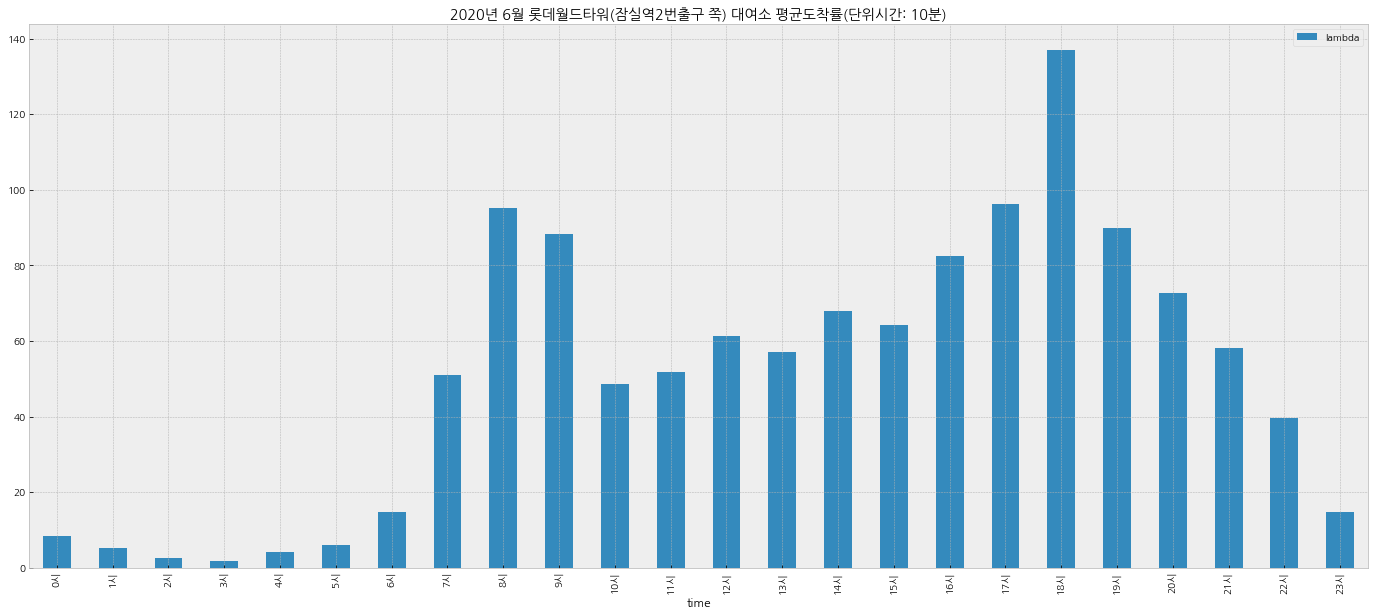

In [117]:
result.plot(kind = 'bar', x = 'time', y = 'lambda', figsize = (24, 10), 
            title = '2020년 6월 롯데월드타워(잠실역2번출구 쪽) 대여소 평균도착률(단위시간: 10분)')
plt.show()

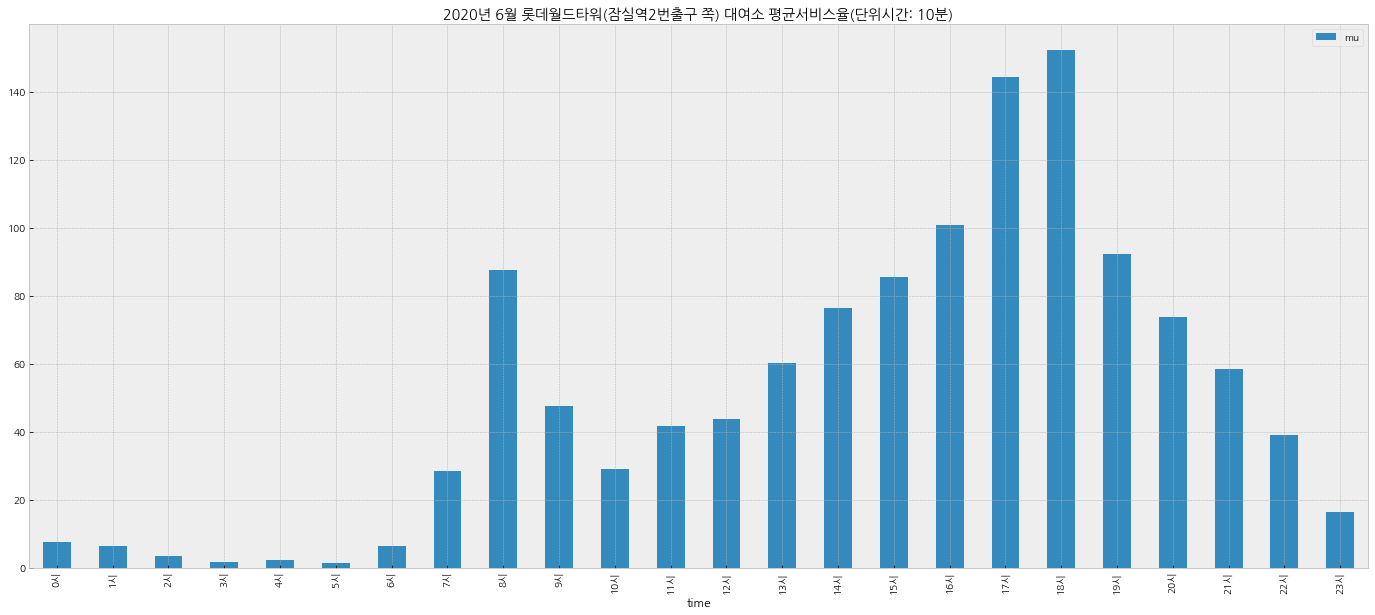

In [118]:
result.plot(kind = 'bar', x = 'time', y = 'mu', figsize = (24, 10), 
            title = '2020년 6월 롯데월드타워(잠실역2번출구 쪽) 대여소 평균서비스율(단위시간: 10분)')
plt.show()

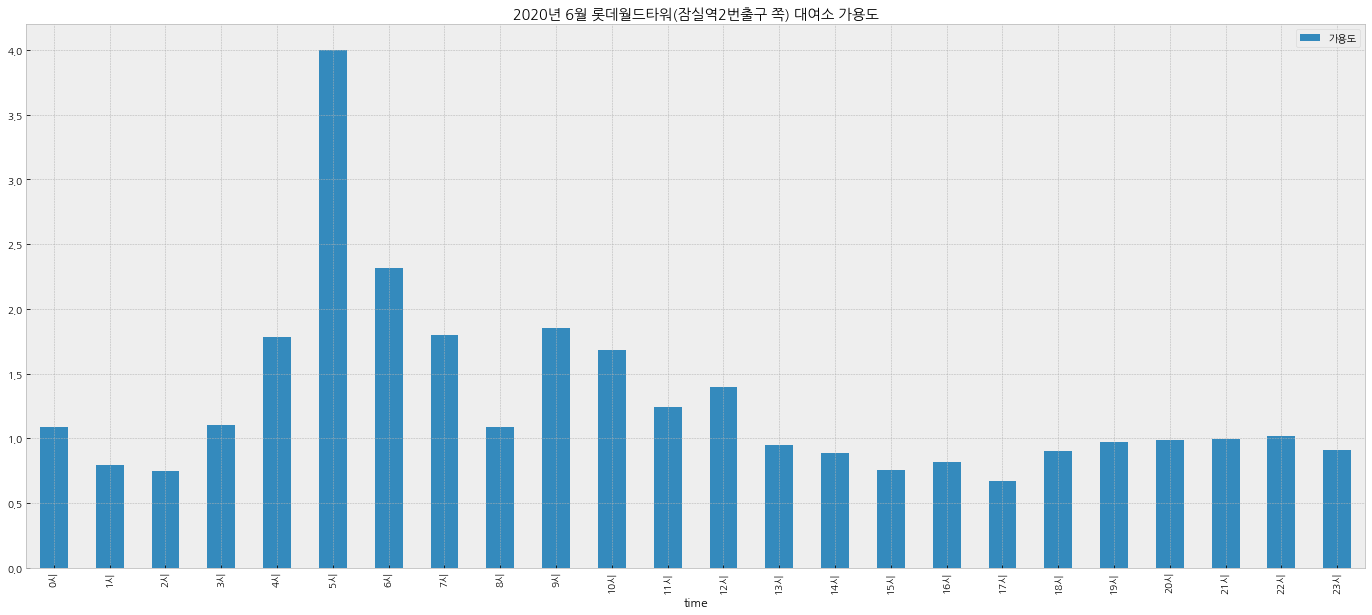

In [119]:
result.plot(kind = 'bar', x = 'time', y = '가용도', figsize = (24, 10), 
            title = '2020년 6월 롯데월드타워(잠실역2번출구 쪽) 대여소 가용도')
plt.show()

- 가용도가 1이하인 시간대는 반납보다 대여가 많아서 자전거 빌리기 어려움
- 1시, 2시, 13시 ~ 21시, 23시일 때 가용도가 1이하
- 5시에 가용도가 확 높아진걸로 보아 이때쯤 자전거 재배치가 이루어 지는 것 같음
- 5시 이후로 가용도가 점점 낮아지는 것으로 보아 출근을 위해 자전거 대여가 많은 것으로 예상됨
- 13시 이후로 계속 가용도가 1이하이므로 이 시간대에 자전거 재배치가 이루어질 필요가 있음
- 2021년 6월 동일 대여소와 비교했을 땐 21년 6월의 가용도가 좀 더 일정하고 좋은 편임.